# Student Grades Prediction (Predict Student GPA)

## Project Overview
This project aims to predict student GPA based on various academic performance indicators. 
The dataset contains information about students' study habits, attendance, and participation.
## Phase 1( Data Loading , Exploration , Cleaning)

In [ ]:
##Import Libraries
# 1) - Libraries for data handling and analysis
import pandas as pd
import numpy as np
# 2) - Libraries for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
# 3) - Libraries for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 4) Libraries for models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
# 5) Libraries for evaluation
from sklearn.metrics import mean_squared_error, r2_score

print('✅ Libraries imported successfully!')

✅ Libraries imported successfully!


In [ ]:

# Load dataset and display first rows
df = pd.read_csv('students_data.csv')
print('✅ Data Loaded Successfully!')
print('Shape:', df.shape)
display(df.head())


✅ Data Loaded Successfully!
Shape: (1000000, 6)


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


In [ ]:
# Display general info and summary statistics
print('\n--- Basic Info ---')
print(df.info())
print('\n--- Descriptive Statistics ---')
display(df.describe())


--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB
None

--- Descriptive Statistics ---


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,15.029127,84.711046,5.985203,84.283845
std,288675.278932,6.899431,9.424143,1.956421,15.432969
min,1.000000,0.000000,50.000000,0.000000,9.400000
25%,250000.750000,10.300000,78.300000,4.700000,73.900000
50%,500000.500000,15.000000,85.000000,6.000000,87.500000
75%,750000.250000,19.700000,91.800000,7.300000,100.000000
max,1000000.000000,40.000000,100.000000,10.000000,100.000000


In [ ]:
# Check for missing values
print('\n--- Missing Values Before ---')
print(df.isnull().sum()/df.shape[0]*100)



--- Missing Values Before ---
student_id                 0.0
weekly_self_study_hours    0.0
attendance_percentage      0.0
class_participation        0.0
total_score                0.0
grade                      0.0
dtype: float64


In [ ]:
# Check duplicate rows in the dataset
duplicates = df.duplicated().sum()
print(f'Number of Duplicates: {duplicates}')

Number of Duplicates: 0


In [ ]:
#Detect Outliers using IQR
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col.lower() != 'student_id']
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    num_outliers = len(outliers)
    print(f'🔹 {col}: {num_outliers} outliers')  
    if num_outliers > 0:
        print('Values:', outliers.values)


🔹 weekly_self_study_hours: 3541 outliers
Values: [34.  40.  36.6 ... 34.  34.5 33.9]
🔹 attendance_percentage: 3518 outliers
Values: [52.5 57.2 57.4 ... 57.8 55.3 57.7]
🔹 class_participation: 4927 outliers
Values: [0.6 0.8 0.  ... 0.  0.6 0.2]
🔹 total_score: 2027 outliers
Values: [33.8 34.5 34.7 ... 30.4 34.2 33. ]


In [ ]:
# Detect Outliers using Z-score
from scipy.stats import zscore

numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col.lower() != 'student_id']

for col in numeric_cols:

    z_scores = zscore(df[col])
  
    outliers = df[np.abs(z_scores) > 3][col]
  
    num_outliers = len(outliers)
   
    print(f'🔹 {col}: {num_outliers} outliers')

    if num_outliers > 0:
        print('Values:', outliers.values)


🔹 weekly_self_study_hours: 1503 outliers
Values: [40.  36.6 37.4 ... 39.9 36.9 37.5]
🔹 attendance_percentage: 2133 outliers
Values: [52.5 50.  56.1 ... 53.  54.4 55.3]
🔹 class_participation: 1643 outliers
Values: [0. 0. 0. ... 0. 0. 0.]
🔹 total_score: 4163 outliers
Values: [33.8 37.8 34.5 ... 30.4 34.2 33. ]


## Phase 2 (Preprocessing , EDA , Modelbuilding & Evaluation)

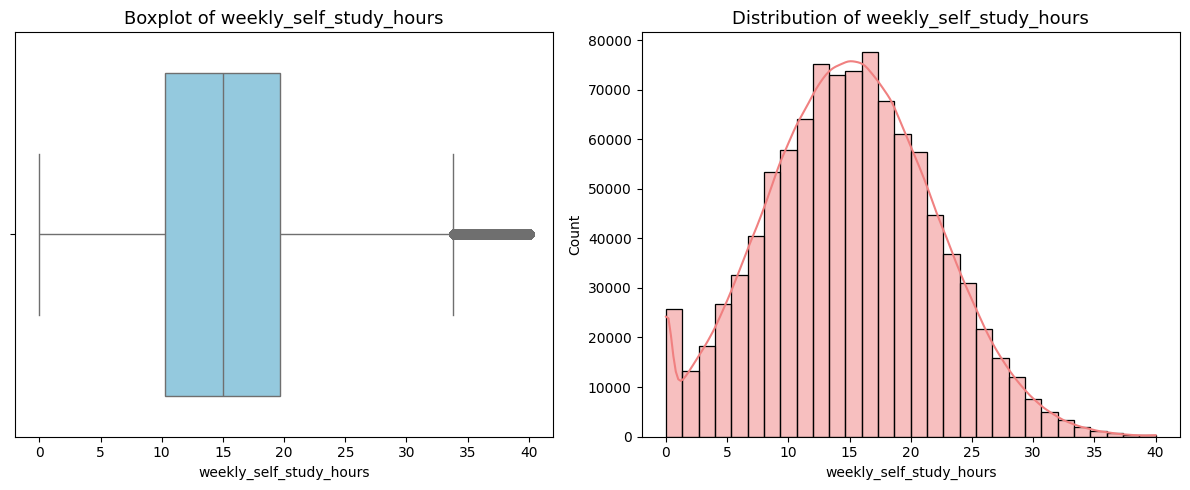

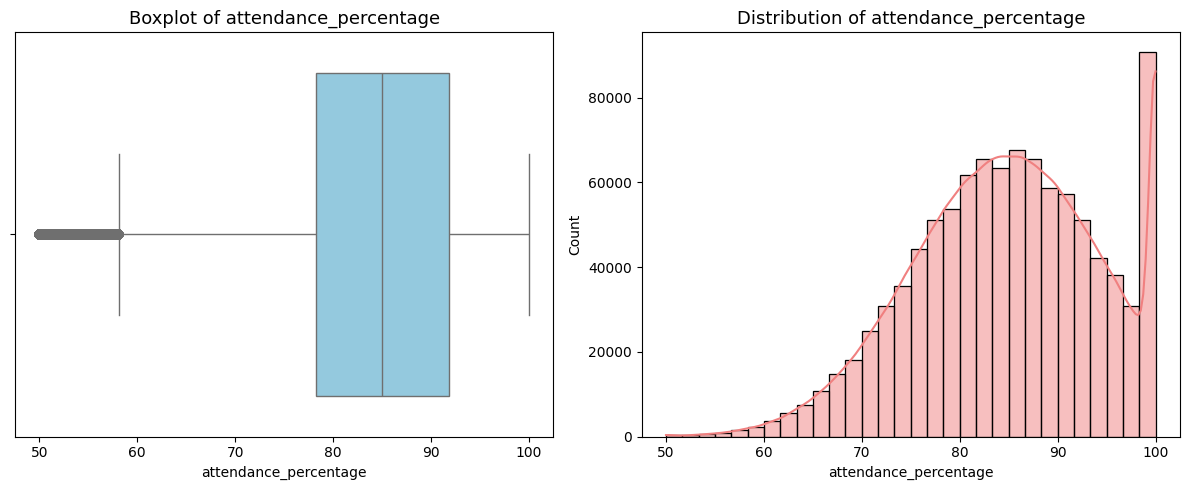

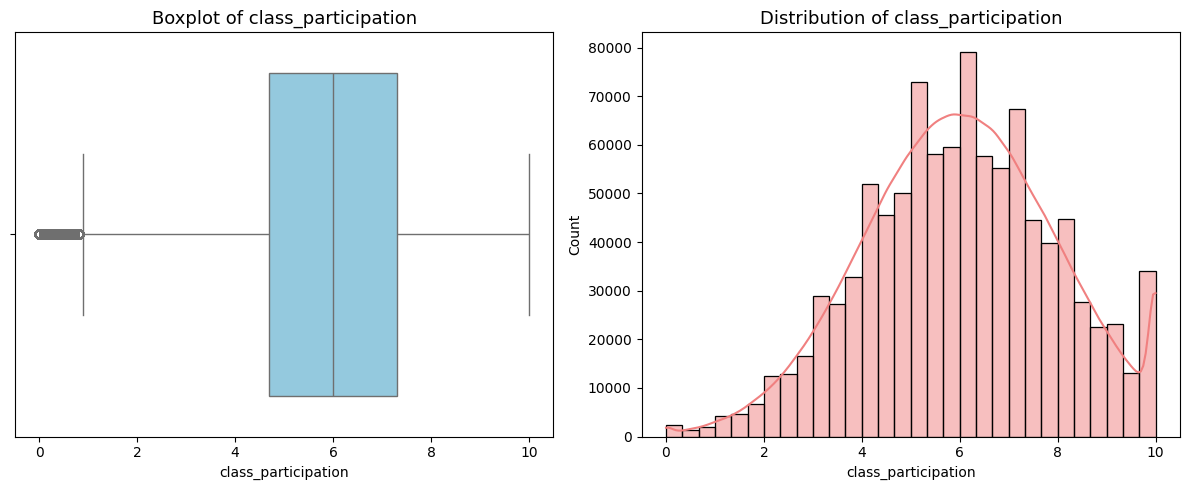

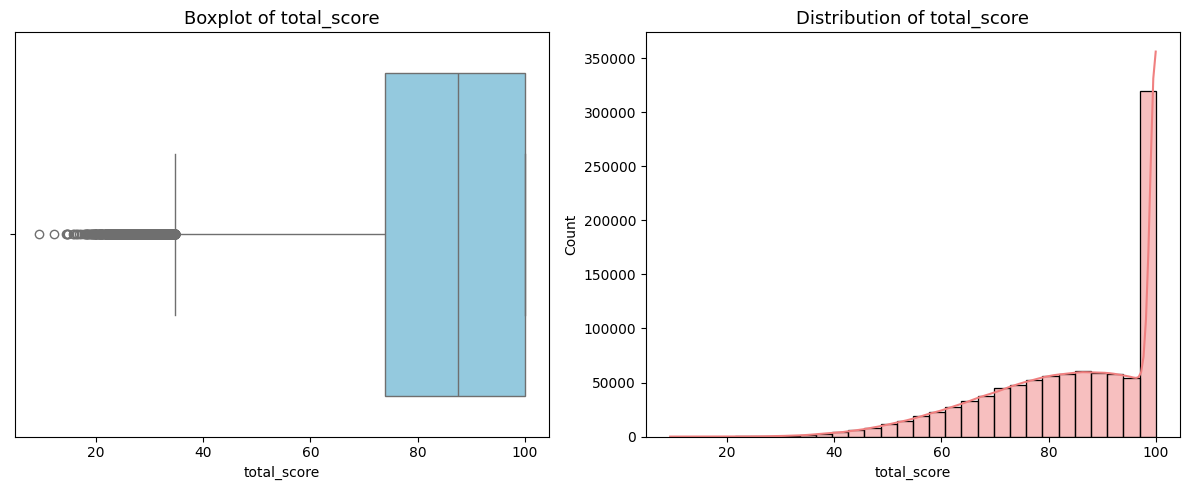

In [8]:
for col in numeric_cols:
    plt.figure(figsize=(12, 5))
 
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=13)
     
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], bins=30, kde=True, color='lightcoral')
    plt.title(f'Distribution of {col}', fontsize=13)

    plt.tight_layout()
    plt.show()


In [9]:
# Check balance of Target column
print("=== Balance of Target Column (grade) ===")
print(df['grade'].value_counts())
print("\nPercentages:")
print(df['grade'].value_counts(normalize=True) * 100)

=== Balance of Target Column (grade) ===
grade
A    548644
B    258174
C    141980
D     44998
F      6204
Name: count, dtype: int64

Percentages:
grade
A    54.8644
B    25.8174
C    14.1980
D     4.4998
F     0.6204
Name: proportion, dtype: float64


In [ ]:
# Drop UNwanted column
df.drop('student_id', axis=1, inplace=True)

In [11]:
#Data Quality Checks
print("=== Data Quality Checks ===\n")

negative_study_hours = (df['weekly_self_study_hours'] < 0).sum()
negative_attendance = (df['attendance_percentage'] < 0).sum()
negative_participation = (df['class_participation'] < 0).sum()



study_hours_over_max = (df['weekly_self_study_hours'] > 168).sum()
attendance_over_100 = (df['attendance_percentage'] > 100).sum()



print(f"Negative Weekly Study Hours: {negative_study_hours}")
print(f"Negative Attendance Percentage: {negative_attendance}")
print(f"Negative Class Participation: {negative_participation}")


print(f"Weekly Study Hours > 168: {study_hours_over_max}")
print(f"Attendance Percentage > 100: {attendance_over_100}")



total_issues = (negative_study_hours + negative_attendance + negative_participation +
                study_hours_over_max + attendance_over_100 )
print("=== Summary ===")
print(f"Total rows: {len(df)}")
print(f"Total data quality issues found: {total_issues}")

=== Data Quality Checks ===

Negative Weekly Study Hours: 0
Negative Attendance Percentage: 0
Negative Class Participation: 0
Weekly Study Hours > 168: 0
Attendance Percentage > 100: 0
=== Summary ===
Total rows: 1000000
Total data quality issues found: 0


In [12]:
#Remove Outliers (IQR + Z-score)
from scipy import stats

numeric_cols = ['weekly_self_study_hours', 'attendance_percentage', 'class_participation']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col} - Outliers count: {len(outliers)}")
    before_rows = len(df)

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bounds = Q1 - 1.5 * IQR
upper_bounds = Q3 + 1.5 * IQR

mask_iqr = ((df[numeric_cols] < lower_bounds) | (df[numeric_cols] > upper_bounds)).any(axis=1)
print("Number of outliers to delete using IQR:", mask_iqr.sum())
df = df[~mask_iqr]
after_rows = len(df)
print("Number of outlier rows deleted:", before_rows - after_rows)

zscores = np.abs(stats.zscore(df[numeric_cols], nan_policy="omit"))
mask_z = (zscores > 3).any(axis=1)
print("📌 Number of rows containing Z-score outliers (before delete):", mask_z.sum())
df_before_z = len(df)
df = df[~mask_z]
df_after_z = len(df)
print("🗑️ Number of Z-score outlier rows deleted:", df_before_z - df_after_z)

print("✅ Outliers removed successfully using IQR and Z-score.")


weekly_self_study_hours - Outliers count: 3541
attendance_percentage - Outliers count: 3518
class_participation - Outliers count: 4927
Number of outliers to delete using IQR: 11940
Number of outlier rows deleted: 11940
📌 Number of rows containing Z-score outliers (before delete): 0
🗑️ Number of Z-score outlier rows deleted: 0
✅ Outliers removed successfully using IQR and Z-score.


In [13]:
df = df.reset_index(drop=True)


In [14]:
# Verify Remaining Outliers
for col in numeric_cols:
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    
   
    zscores_col = np.abs(stats.zscore(df[col], nan_policy="omit"))
    outliers_z = df[zscores_col > 3]
    
    print(f"{col} - Remaining outliers (IQR): {len(outliers_iqr)}, Remaining outliers (Z-score): {len(outliers_z)}")


weekly_self_study_hours - Remaining outliers (IQR): 0, Remaining outliers (Z-score): 0
attendance_percentage - Remaining outliers (IQR): 0, Remaining outliers (Z-score): 0
class_participation - Remaining outliers (IQR): 0, Remaining outliers (Z-score): 0


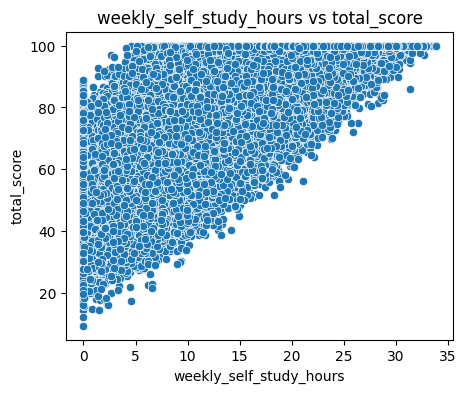

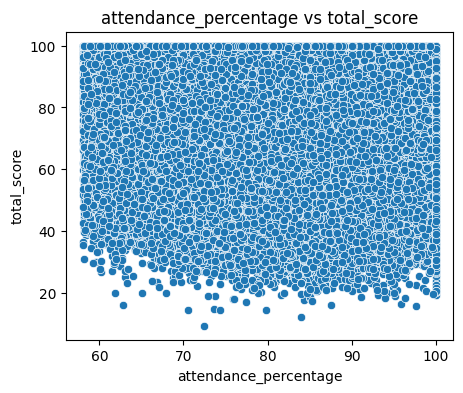

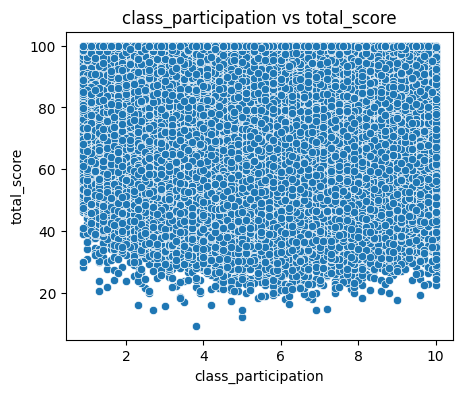

In [15]:
features = ['weekly_self_study_hours', 'attendance_percentage', 'class_participation']

for col in features:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=df[col], y=df['total_score'])
    plt.title(f"{col} vs total_score")
    plt.show()


In [16]:
#Skewness & Kurtosis
print("=== Skewness & Kurtosis ===")
for col in numeric_cols:
    print(f"\n🔹 {col}")
    print(f"Skewness:  {df[col].skew():.3f}")
    print(f"Kurtosis:  {df[col].kurt():.3f}")


=== Skewness & Kurtosis ===

🔹 weekly_self_study_hours
Skewness:  0.024
Kurtosis:  -0.368

🔹 attendance_percentage
Skewness:  -0.226
Kurtosis:  -0.558

🔹 class_participation
Skewness:  -0.035
Kurtosis:  -0.441


In [ ]:
X = df.drop(columns=['grade', 'total_score'])
y = df['grade']

print("✅ Features and Target separated successfully!")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (988060, 3)
y shape: (988060,)


In [18]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns
)

print("✅ Scaling done")


✅ Scaling done


In [19]:
import joblib

joblib.dump(scaler, "scaler.pkl")
print("✅ Scaler saved successfully!")


✅ Scaler saved successfully!


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)

print("✅ Split done")


✅ Split done


In [21]:
#Save Cleaned & Preprocessed Data
df.to_csv('students_data_cleaned.csv', index=False)
preprocessed_df = pd.concat([X_scaled, y], axis=1)
preprocessed_df.to_csv('students_data_preprocessed.csv', index=False)
print('✅ Data saved successfully!')


✅ Data saved successfully!


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)

class_weight_dict = dict(zip(classes, class_weights))
print("Class Weights:", class_weight_dict)


In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("✅ KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier( random_state=42,class_weight=class_weight_dict)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("✅ Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weight_dict)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("✅ Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    num_class=len(classes),
    eval_metric='mlogloss',
    random_state=42
)

xgb.fit(
    X_train,
    y_train,
    sample_weight=y_train.map(class_weight_dict)
)

y_pred_xgb = xgb.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("✅ XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

sgd_lr = SGDClassifier(
    loss='log',         
    max_iter=1000,      
    tol=1e-3,            
    random_state=42,
    class_weight=class_weight_dict
)

sgd_lr.fit(X_train, y_train)

y_pred_sgd = sgd_lr.predict(X_test)

print("✅ SGD Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_sgd))


In [27]:
import joblib

joblib.dump(gb_reg, "final_regression_model.pkl")

joblib.dump(scaler, "scaler.pkl")

print("✅ Gradient Boosting Model & Scaler saved successfully!")


✅ Gradient Boosting Model & Scaler saved successfully!


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()


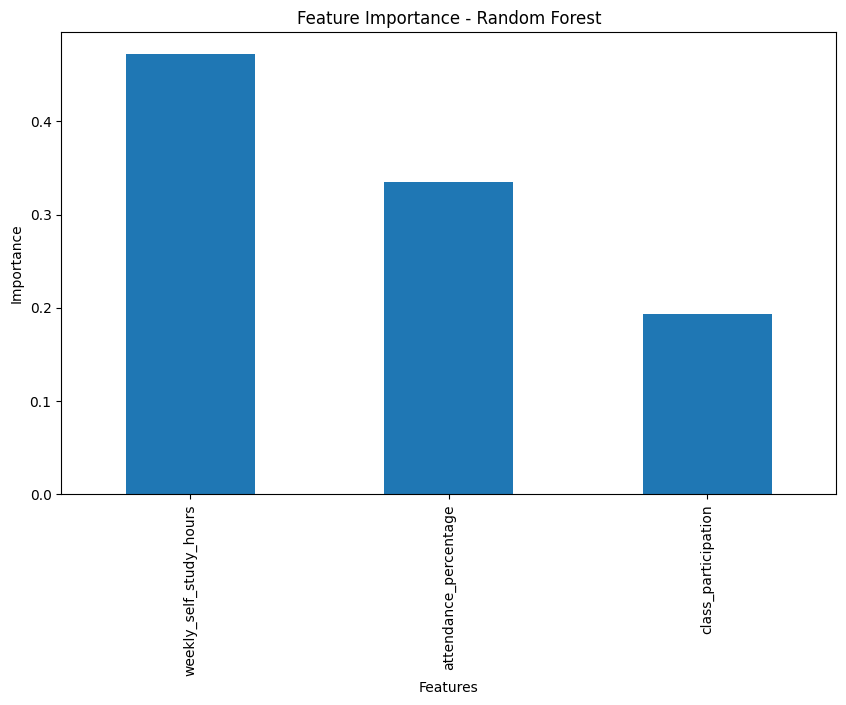

In [ ]:
# Random Forest Feature Importance
import pandas as pd
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feature_names = X_train.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


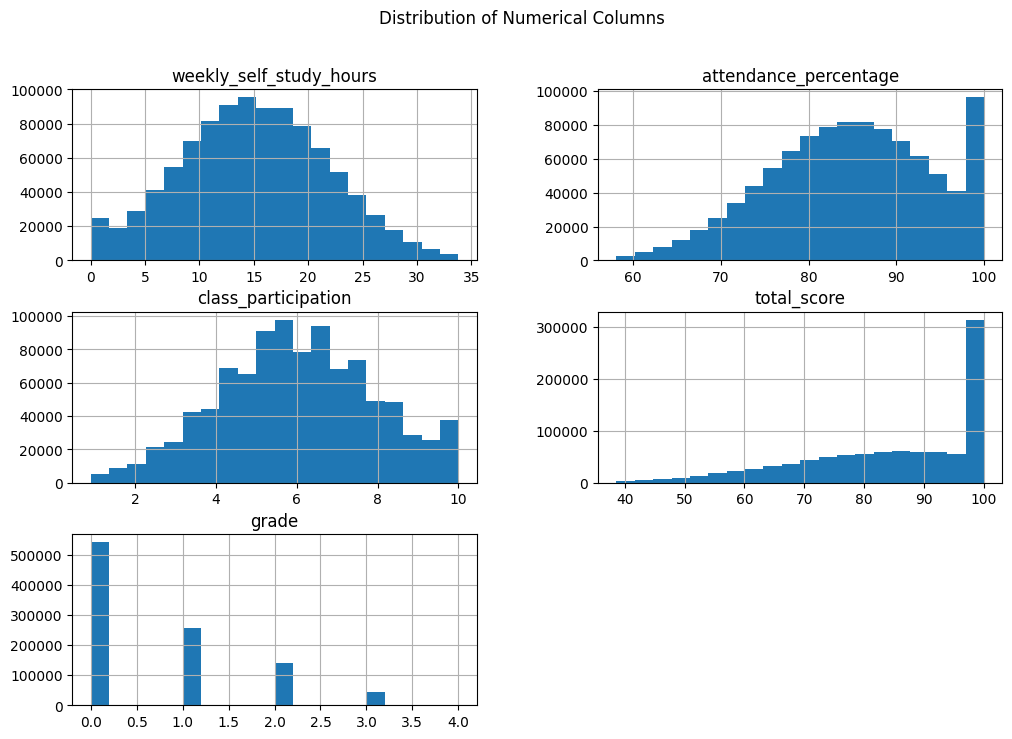

In [ ]:
#Histograms of Numeric Columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Distribution of Numerical Columns")
plt.show()


In [ ]:
#Count Plots for Categorical Columns
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
    plt.show()


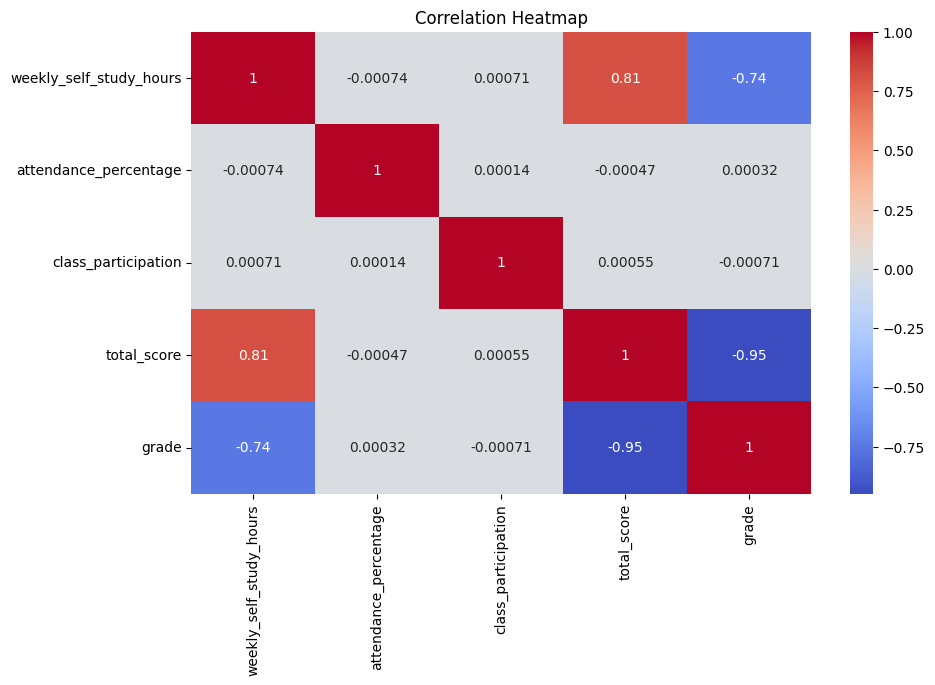

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


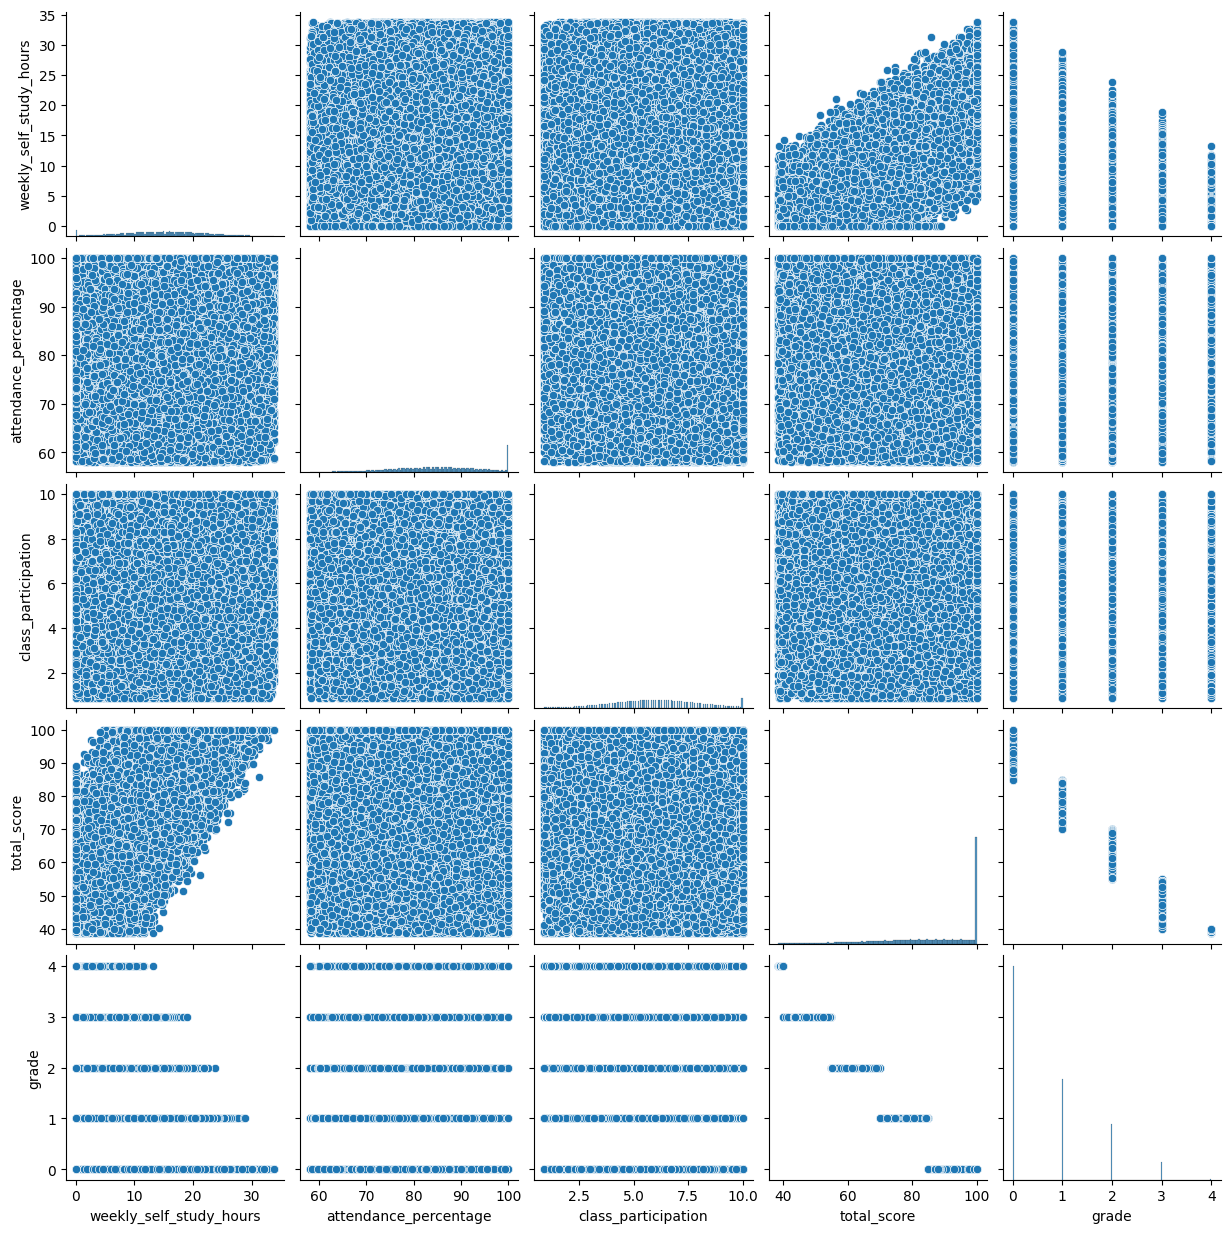

In [ ]:
#Pairplot of Numeric Columns
sns.pairplot(df.select_dtypes(include=['int64', 'float64']))
plt.show()


In [ ]:
#Summary Table (EDA)
summary = []
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)].shape[0]
        summary.append({
            "Column": col,
            "Mean": df[col].mean(),
            "Median": df[col].median(),
            "Std": df[col].std(),
            "Min": df[col].min(),
            "Max": df[col].max(),
            "Outliers": outliers
        })
    else:
        counts = df[col].value_counts().to_dict()
        summary.append({
            "Column": col,
            "Unique Values": len(df[col].unique()),
            "Top Values": counts
        })

eda_summary = pd.DataFrame(summary)
display(eda_summary)


,Column,Mean,Median,Std,Min,Max,Outliers
0,weekly_self_study_hours,15.019702,15.0,6.748690,0.0,33.8,0
1,attendance_percentage,84.814132,85.1,9.274733,58.1,100.0,0
2,class_participation,6.012601,6.0,1.920949,0.9,10.0,0
3,total_score,84.464243,87.5,15.078407,38.6,100.0,0
4,grade,0.688882,0.0,0.889617,0.0,4.0,46153


In [ ]:
#Random Forest Feature Importance (Alternative)
import seaborn as sns
rf_temp = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_temp.fit(X_train, y_train)

importances = rf_temp.feature_importances_
features = X_train.columns

feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importance:")
print(feat_imp_df)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp_df, x="Importance", y="Feature")
plt.title("Feature Importance (Random Forest)")
plt.show()


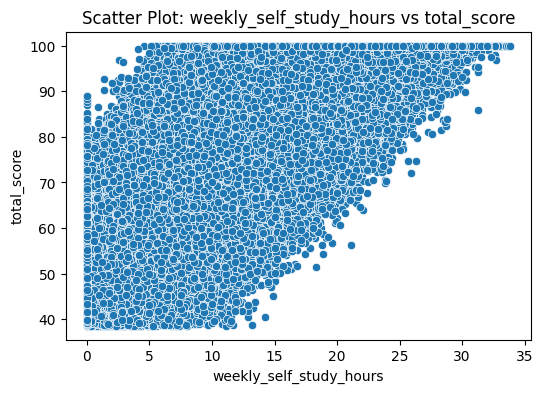

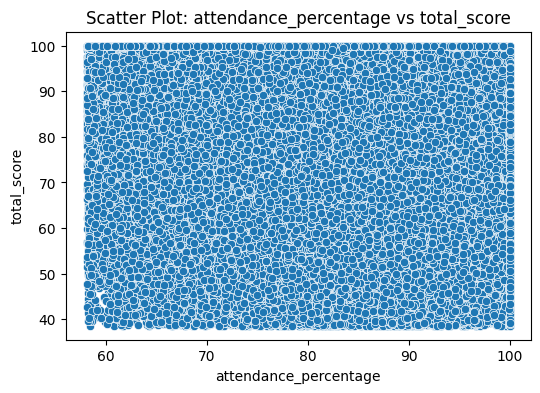

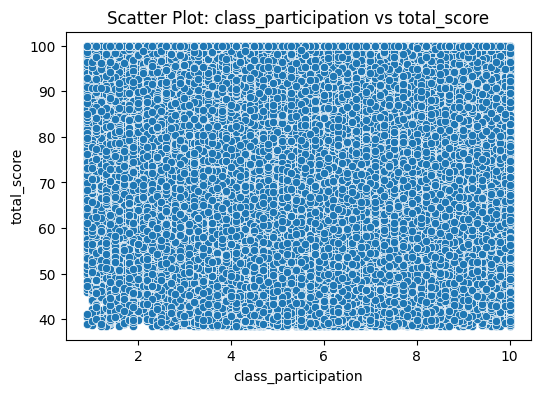

In [ ]:
#Scatter Plots vs Total Score
for col in numeric_cols:
    if col != 'total_score':
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=df, x=col, y='total_score')
        plt.title(f"Scatter Plot: {col} vs total_score")
        plt.show()


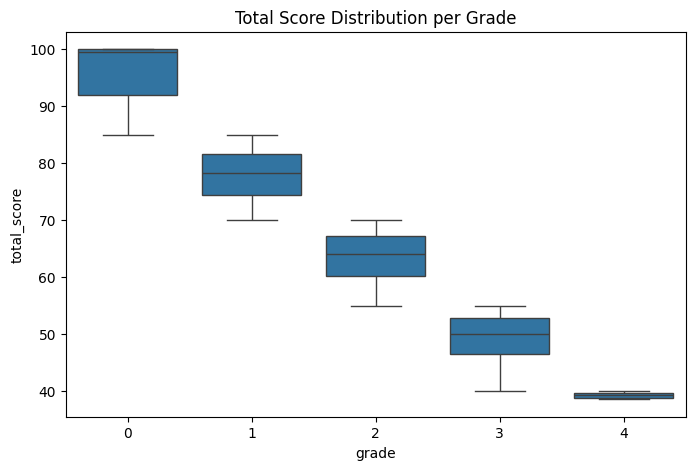

In [ ]:
# Boxplot of Total Score per Grade
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='grade', y='total_score')
plt.title("Total Score Distribution per Grade")
plt.show()


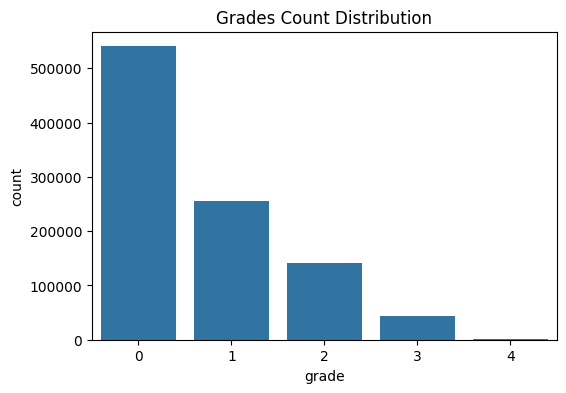

In [ ]:
#Count Plot of Grades
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='grade')
plt.title("Grades Count Distribution")
plt.show()


In [ ]:
#GroupBy Grade
group_stats = df.groupby('grade').mean()
print("=== GroupBy Grade (Mean Values) ===")
display(group_stats)


=== GroupBy Grade (Mean Values) ===


,weekly_self_study_hours,attendance_percentage,class_participation,total_score
grade,,,,
0,19.269101,84.814397,6.013636,96.016511
1,12.116791,84.802395,6.013423,77.947295
2,7.691591,84.834766,6.005572,63.564285
3,3.761574,84.815775,6.019384,49.381346
4,1.908229,84.737130,5.957670,39.300922


In [ ]:
# Rare Categories (<1%)
print("=== Rare Categories (<1%) ===")
for col in df.select_dtypes(include=['object', 'category']).columns:
    freq = df[col].value_counts(normalize=True) * 100
    rare = freq[freq < 1]
    if len(rare) > 0:
        print(f"\nColumn: {col}")
        print(rare)


=== Rare Categories (<1%) ===


In [ ]:
#Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

print("=== VIF Table ===")
display(vif_data)


=== VIF Table ===


,Feature,VIF
0,weekly_self_study_hours,2.962365
1,attendance_percentage,1.000001
2,class_participation,1.000001
3,total_score,2.962363


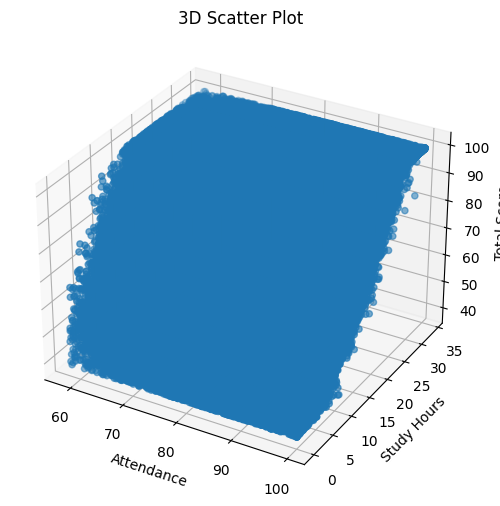

In [ ]:
# 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['attendance_percentage'], df['weekly_self_study_hours']
ax.set_xlabel("Attendance") 
ax.set_ylabel("Study Hours")
plt.title("3D Scatter Plot")
plt.show()


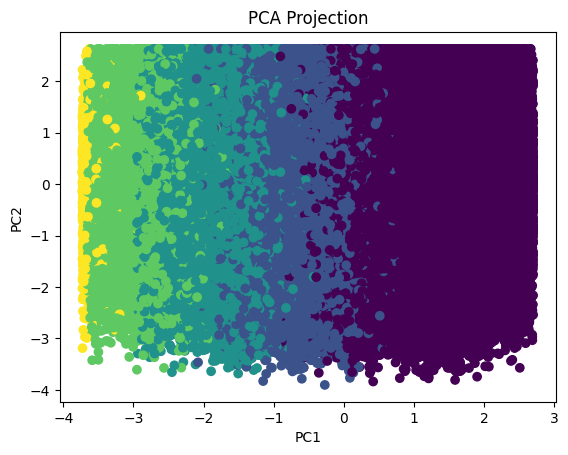

In [ ]:
# PCA Projection
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.scatter(pca_result[:,0], pca_result[:,1], c=y)
plt.title("PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


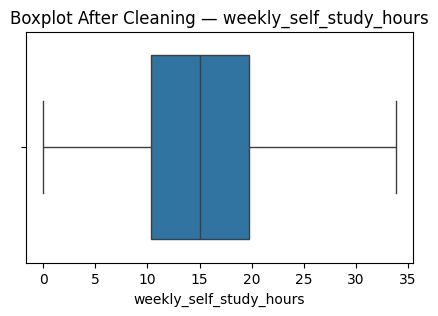

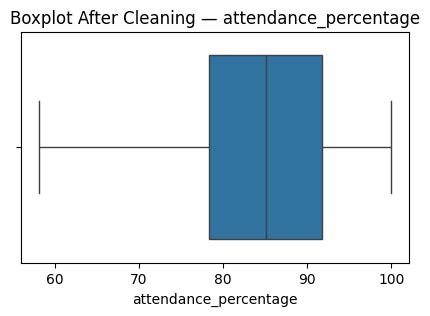

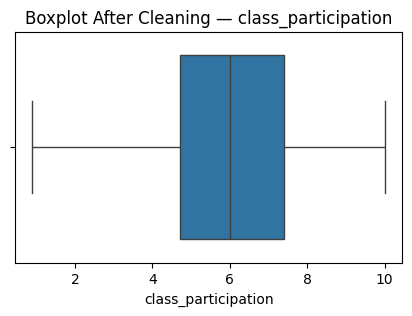

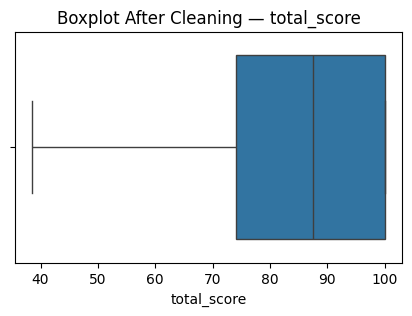

In [ ]:
#Boxplots After Cleaning
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot After Cleaning — {col}")
    plt.show()


In [ ]:
#  Key Insights Summary
print("=== Key Insights Summary ===")
print("\n1. Target Distribution:")
print(df['grade'].value_counts(normalize=True) * 100)

print("\n3. Most Important Features (Random Forest):")
print(feat_imp.head())


=== Key Insights Summary ===

1. Target Distribution:
grade
0    54.964436
1    26.030455
2    14.312022
3     4.538628
4     0.154460
Name: proportion, dtype: float64

2. Correlation with Total Score:
total_score                1.000000
weekly_self_study_hours    0.813899
class_participation        0.000550
attendance_percentage     -0.000469
grade                     -0.949359
Name: total_score, dtype: float64

3. Most Important Features (Random Forest):
total_score                0.833598
weekly_self_study_hours    0.162589
attendance_percentage      0.002088
class_participation        0.001725
dtype: float64


In [ ]:
sch_df = pd.read_csv('Universities_Schoolarships_All_Around_the_World_updated.csv')
print("✅ Scholarships Data Loaded Successfully!")
print("Shape:", sch_df.shape)
display(sch_df.head())

✅ Scholarships Data Loaded Successfully!
Shape: (879, 6)


,Unnamed: 0,title,degrees,funds,date,location
0,0,Schaefer Halleen’s Social Equity Scholarship,"A,B",$1000,30 June 2022,united-states
1,1,President’s Scholarship for Ukraine,"A,B,C",$2500,31 July 2022,united-states
2,2,International Students Diversity Contest 2022-...,"A,B,C","Up to $2,000",22 December 2022,united-states
3,3,Master in Business Administration 80% OFF your...,A,80% Tuition Fees,15 September 2022,united-states
4,4,Improve Men’s Health Scholarship,"A,B",$2000,31 May 2022,united-states


In [ ]:
print("\n--- Scholarships Info ---")
print(sch_df.info())
print("\n--- Columns ---")
print(sch_df.columns)


--- Scholarships Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  879 non-null    int64 
 1   title       879 non-null    object
 2   degrees     830 non-null    object
 3   funds       794 non-null    object
 4   date        588 non-null    object
 5   location    879 non-null    object
dtypes: int64(1), object(5)
memory usage: 41.3+ KB
None

--- Columns ---
Index(['Unnamed: 0', 'title', 'degrees', 'funds', 'date', 'location'], dtype='object')


In [ ]:
sch_df.columns = sch_df.columns.str.lower().str.strip().str.replace(" ", "_")
display(sch_df.head())


,unnamed:_0,title,degrees,funds,date,location
0,0,Schaefer Halleen’s Social Equity Scholarship,"A,B",$1000,30 June 2022,united-states
1,1,President’s Scholarship for Ukraine,"A,B,C",$2500,31 July 2022,united-states
2,2,International Students Diversity Contest 2022-...,"A,B,C","Up to $2,000",22 December 2022,united-states
3,3,Master in Business Administration 80% OFF your...,A,80% Tuition Fees,15 September 2022,united-states
4,4,Improve Men’s Health Scholarship,"A,B",$2000,31 May 2022,united-states


In [ ]:
print("=== Missing Values (%) ===")
print(sch_df.isnull().sum() / len(sch_df) * 100)

=== Missing Values (%) ===
unnamed:_0     0.000000
title          0.000000
degrees        5.574516
funds          9.670080
date          33.105802
location       0.000000
dtype: float64


In [ ]:
for col in sch_df.columns:
    if sch_df[col].dtype == 'object':
        sch_df[col] = sch_df[col].fillna("Unknown")
    else:
        sch_df[col] = sch_df[col].fillna(sch_df[col].median())
print("✅ Missing values handled")

✅ Missing values handled safely


In [ ]:
duplicates_count = sch_df.duplicated().sum()
print(f"Number of duplicate rows before dropping: {duplicates_count}")

before = len(sch_df)
sch_df.drop_duplicates(inplace=True)
after = len(sch_df)

print(f"✅ Duplicates removed: {before - after}")


Number of duplicate rows before dropping: 0
✅ Duplicates removed: 0


In [ ]:
valid_grades = ['A','B','C','D','F']
sch_df['degrees'] = sch_df['degrees'].apply(lambda x: x if any(g in valid_grades for g in str(x).split(',')) else 'Unknown')

sch_df['degrees'] = sch_df['degrees'].apply(lambda x: ','.join([g for g in str(x).split(',') if g in valid_grades]))

print("=== Available Grades After Cleaning ===")
print(sch_df['degrees'].value_counts())

=== Available Grades After Cleaning ===
degrees
A        310
B        134
A,B,C    124
B,A       77
          76
A,B       71
C         48
A,C       16
B,A,C     12
C,A        8
B,C        3
Name: count, dtype: int64


In [ ]:
def assign_scholarship_score(row):
    score = 0
    funds_str = str(row['funds']).lower()
    if any(keyword in funds_str for keyword in ['full', '100%', 'full tuition', 'fully funded', 'full cost']):
        score += 30
    return score
sch_df['scholarship_score'] = sch_df.apply(assign_scholarship_score, axis=1)

In [ ]:
sch_df_sorted = sch_df.sort_values(by='scholarship_score', ascending=False).reset_index(drop=True)

In [ ]:
def get_top_scholarships_by_grade(grade, df_sorted, top_n=20):
    filtered = df_sorted[
        df_sorted['degrees'].apply(
            lambda x: grade in [g.strip() for g in str(x).split(',')]
        )
    ]
    filtered = filtered.sort_values(by='scholarship_score', ascending=False)
    return filtered.head(top_n)

In [ ]:

top_A = get_top_scholarships_by_grade('A', sch_df_sorted, 20)


top_B = get_top_scholarships_by_grade('B', sch_df_sorted, 20)


top_C = get_top_scholarships_by_grade('C', sch_df_sorted, 20)

In [ ]:
sch_df_sorted.to_csv("ranked_scholarships.csv", index=False)

top_A.to_csv("top_scholarships_A.csv", index=False)
top_B.to_csv("top_scholarships_B.csv", index=False)
top_C.to_csv("top_scholarships_C.csv", index=False)

## 📌 Conclusion

- ✅ Loaded and cleaned the scholarships dataset.
- ✅ Handled missing values and duplicates.
- ✅ Preprocessed the 'degrees' column for valid grades.
- ✅ Implemented Grade Prediction model (Model 1) using student data.
- ✅ Implemented Scholarship Recommendation system (Model 2) based on predicted grades.
- ✅ Integrated both models in Streamlit for interactive predictions and recommendations.

🎯 The system can now predict a student's grade and recommend relevant scholarships.
""")
